In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [212]:
df = pd.read_csv("diabetes2.csv")

In [213]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [214]:
inp_df = df.drop(df.columns[[8]], axis=1)
out_df = df[['Outcome']]
out_df

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [215]:
mean = inp_df.mean(axis=0)
std = inp_df.std(axis=0)
inp_df = (inp_df - mean)/std
const = np.ones(768)
inp_df.insert(loc = 0, column = 'const', value = const)
inp_df

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,1.0,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.0,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,1.0,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,1.0,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...,...,...
763,1.0,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487
764,1.0,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677
765,1.0,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580
766,1.0,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970


In [216]:
x_training = inp_df.head(614)
x_test = inp_df.tail(154)
y_training, y_test = out_df[0:614], out_df[614:768]
y_t = np.array(y_training)
y_ts = np.array(y_test)
x_training

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,1.0,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.0,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,1.0,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,1.0,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...,...,...
609,1.0,-0.844335,-0.309469,-0.367098,-0.472440,0.886819,-1.013751,-1.007689,-0.870806
610,1.0,-0.250789,-0.465853,-0.780410,0.029058,0.678565,-0.138579,-0.542894,-0.785774
611,1.0,-0.250789,1.660967,-0.573754,0.091745,0.990945,0.115094,0.365570,0.234614
612,1.0,0.936304,1.473307,0.976169,1.345490,2.092955,0.787328,0.951091,0.574743


In [217]:
def update_weight(rate, dw, w):
    w -= (rate*(dw.T))
    return w

In [218]:
def weight_initiate(n_features):
    w = np.zeros((1,n_features))
    return w

In [219]:
def sigmoid(fn):
    y_cap = 1/(1+np.exp(-fn))
    return y_cap

In [241]:
def cal_loss(y,y_cap):
    y_t = y.T
    loss = -(np.sum((y_t*np.log(y_cap)) + ((1-y_t)*(np.log(1-y_cap)))))/614
    return loss

In [242]:
def cal_der(x,y,y_cap):
    dw = np.dot(x.T , (y_cap - y.T).T)/614
    return dw

In [248]:
def model_optimize(w, X, Y):
    m = 614
    y_cap = sigmoid(np.dot(w,X.T))
    loss = cal_loss(Y, y_cap)
    dw = cal_der(X,Y,y_cap)
    
    
    weights = {"dw": dw}
    

    return weights,loss

In [249]:
def model_predict(w, X, Y, learning_rate, Epoch):
    losses = []
    for i in range(Epoch):
        
        grads, loss = model_optimize(w,X,Y)
        
        dw = grads["dw"]
        
        w = update_weight(learning_rate, dw, w)
       
        if (i % 100 == 0):
            losses.append(loss)
            print("Epoch ", i ,"Loss:", loss)

    coeff = {"w": w}
    gradient = {"dw": dw}
    
    
    return coeff, gradient, losses

In [250]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [251]:
def calc_accuracy(pred, res, n):
    counter = 0
    for i in range(pred.shape[1]):
        if (pred[0][i] == 0 and res[0][i]==0) or (pred[0][i] == 1 and res[0][i]==1):
            counter += 1
    accuracy = counter/n
    return accuracy

In [252]:
n_features = x_training.shape[1]
w = weight_initiate(n_features)

coeff, gradient, losses = model_predict(w, x_training, y_t, 0.0001, 4500)

w = coeff["w"]
print('Optimized weights', w)


final_test_pred = sigmoid_activation(np.dot(w,x_test.T))

m_ts =  x_test.shape[0]



Epoch  0 Loss: 0.6931471805599453
Epoch  100 Loss: 0.6918047496558946
Epoch  200 Loss: 0.6904738267744511
Epoch  300 Loss: 0.6891543023647759
Epoch  400 Loss: 0.6878460676115543
Epoch  500 Loss: 0.6865490144433982
Epoch  600 Loss: 0.6852630355407459
Epoch  700 Loss: 0.68398802434327
Epoch  800 Loss: 0.6827238750568013
Epoch  900 Loss: 0.6814704826597793
Epoch  1000 Loss: 0.6802277429092375
Epoch  1100 Loss: 0.6789955523463354
Epoch  1200 Loss: 0.677773808301444
Epoch  1300 Loss: 0.676562408898798
Epoch  1400 Loss: 0.6753612530607213
Epoch  1500 Loss: 0.67417024051144
Epoch  1600 Loss: 0.6729892717804883
Epoch  1700 Loss: 0.6718182482057213
Epoch  1800 Loss: 0.6706570719359433
Epoch  1900 Loss: 0.6695056459331609
Epoch  2000 Loss: 0.6683638739744736
Epoch  2100 Loss: 0.6672316606536092
Epoch  2200 Loss: 0.6661089113821157
Epoch  2300 Loss: 0.6649955323902197
Epoch  2400 Loss: 0.6638914307273613
Epoch  2500 Loss: 0.6627965142624139
Epoch  2600 Loss: 0.6617106916836015
Epoch  2700 Loss: 0

In [253]:
y_ts_pred = predict(final_test_pred, m_ts)
accuracy = calc_accuracy(y_ts_pred, y_ts.T, m_ts)
print("accuracy is:",accuracy*100,"%")


accuracy is: 76.62337662337663 %


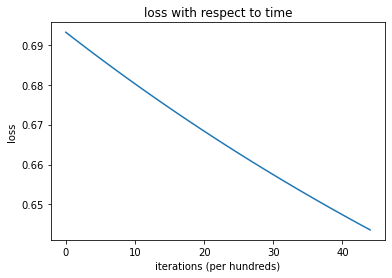

In [254]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.title('loss with respect to time')
plt.show()